In [105]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


## Nombre: Diego Felipe Diaz Perez


# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error asociado a $f'(x)$ absoluto en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [106]:
def derivada(f,x, tol = 1e-8,m=1000):
  '''
  funcion para hacer la derivada con cierta tolerancia
  entra:
  f=funcion a derivar
  x= valor de x a evaluar en la derivada
  tol= tolerancia que se quiere
  m= maximo de iteraciones
  devuelve:
  derivadas= lista con todas las derivadas calculadas
  h_vals= lista con todos los valores de h
  '''
  df1=0
  h=0.1 #definimos el valor inicial de h
  derivadas=[]
  h_vals=[] #iniciamos las listas donde vamos a guardar los valores de las derivadas y de h
  for i in range(0,m):
    df=(f(x+h)-f(x-h))/(2*h) #formula de la derivada
    derivadas.append(df)
    h_vals.append(h) #agregamos las variables a las listas
    if abs(df1-df)<tol: #verificamos si se cumple que las derivadas esta bajo la tolerancia
      return derivadas,h_vals #devolvemos las listas
    else:
      h=h/2 #en caso de no cumplirse la tolerancia reducimos el h y la derivada encontrada se vuelve la incial para continuar con el ciclo
      df1=df
  return print("numero maximo de iteraciones")
f=lambda x: 3**x #funcion a derivar
print("derivadas:",derivada(f,2)[0])
print("valores de h:",derivada(f,2)[1])


derivadas: [9.90741213869141, 9.89248373184406, 9.888753740799991, 9.88782137491846, 9.887588291690008, 9.887530021397595, 9.887515453856395, 9.887511811974719, 9.88751090150572, 9.88751067387966, 9.887510616972577, 9.88751060276627, 9.88751059921924]
valores de h: [0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125, 0.000390625, 0.0001953125, 9.765625e-05, 4.8828125e-05, 2.44140625e-05]


Text(0, 0.5, 'error absoluto')

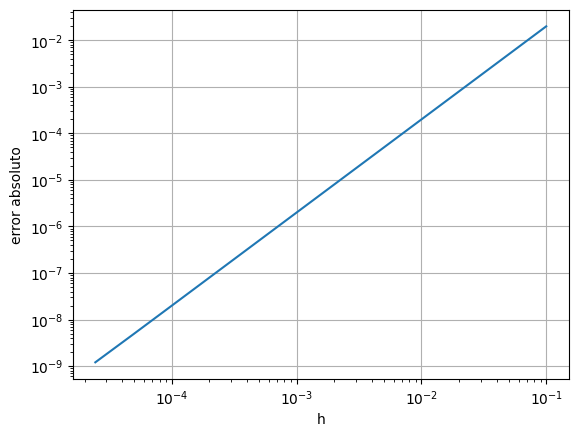

In [107]:
df=lambda x: 3**x*np.log(3) #funcion de la derivada exacta
der_f=df(2)
d=np.array(derivada(f,2)[0])
h=np.array(derivada(f,2)[1]) #convertimos las listas que nos da la funcion de la derivada en arrays para poder operar con ellas
err=abs(d-der_f) #calculamos el error absoluto
plt.loglog(h,err) #hacemos la grafica logaritmica
plt.grid()
plt.xlabel("h")
plt.ylabel("error absoluto")

## 2


**(40 puntos)** Considere una barra delgada y homogénea de longitud $L = 1.0\ \text{m}$ que está sometida a una conducción de calor en régimen estacionario. Se ha medido la temperatura a lo largo de la barra en ciertos puntos:

| $x$ (m) | $T(x)$ (°C) |
|--------|--------------|
| 0.0    | 100.0        |
| 0.2    | 92.1         |
| 0.4    | 77.8         |
| 0.6    | 59.3         |
| 0.8    | 35.6         |
| 1.0    | 10.0         |


Con base en estos datos responda:

---

a. Encuentre una expresión para el polinomio interpolador de **Lagrange** para $T(x)$

---

b. Usando la función obtenida por **Lagrange** y haciendo **CubicSpline**, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.

---

c. Calcule el **gradiente térmico** $\frac{dT}{dx}$ usando los datos procedentes de interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

d. Determinar el **flujo de calor** $q(x) = -k \frac{dT}{dx}$ con $k = 401\ \text{W/m·K}$ (cobre) y grafique para $x\in [0, 1]$.



In [108]:
#a
xm=np.array([0.0,0.2,0.4,0.6,0.8,1.0])
t=np.array([100,92.1,77.8,59.3,35.6,10.0]) #definimos los arrays de los datos experimentales
lag=lagrange(xm,t) #hacemos la interpolacion de lagrange
print(lag)

       5       4         3         2
195.3 x - 474 x + 419.3 x - 222.3 x - 8.333 x + 100


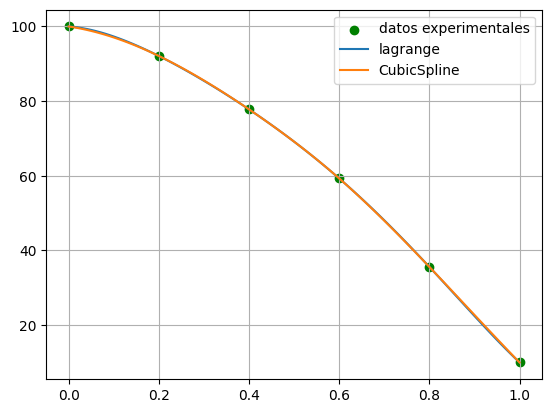

In [115]:
#b
cub=CubicSpline(xm,t) #hacemos la interpolacion de cubicspline
xi=np.linspace(min(xm),max(xm),100) #definimos los x para poder graficar
plt.scatter(xm,t,color="green",label="datos experimentales") #colocamos los puntos experimentales
plt.plot(xi,lag(xi),label="lagrange")
plt.plot(xi,cub(xi),label="CubicSpline") #graficamos las funciones de interpolacion
plt.grid()
plt.legend()

In [110]:
#c
gra=np.gradient(cub(xm),1e-4) #hacemos la derivada de t con respecto a x con el polinomio de interpolacion de cubic y un espaciado de 1e-4
print(gra)

[ -79000. -111000. -164000. -211000. -246500. -256000.]


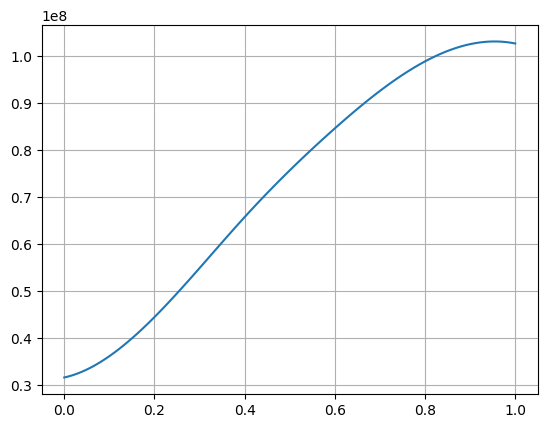

In [111]:
#d
dt=CubicSpline(xm,gra) #hacemos la interpolacion de dt/dx
k=401 #definimos k
def q(k,dt,x):
  '''
  funcion para encontrar el flujo del calor
  entra:
  k= valor de k
  dt= gradiente termico
  x= valores de x a evaluar
  sale:
  valor del flujo de calor
  '''
  q=-k*dt(x) # formula del flujo de calor
  return q
X=np.linspace(0,1,100) #valores en los que se va a graficar desde 0 hasta 1
plt.plot(X,q(k,dt,X)) #graficamos el flujo del calor
plt.grid()

# 3

**(30 puntos)** Consideremos una lámina triangular $R$ con vértices (0,0), (0,3), (3,0) y con densidad  $\rho (x,y) = xy$ [kg/m$^2$]

a. Calcule la masa total del sistema si:

$$
m = \iint_R \rho(x, y)\, dA = \int_0^3\int_0^{3-x} \rho(x,y)\, dydx
$$

Usando una forma iterativa de `quad`, compare su resultado con `dblquad`.


b. Ahora, encuentre el centro de masa de la lámina, si

$$
\bar{x} = \frac{M_y}{m} = \frac{\iint_R x \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}
$$

$$
\bar{y} = \frac{M_x}{m} = \frac{\iint_R y \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}.
$$

Puede usar la forma iterativa de `quad` o `dblquad`.

c. Calcule el **momento de inercia respecto al eje \$x\$**, definido como:

$$
I_x = \iint_R y^2\, \rho(x, y)\, dA,
$$





In [112]:
#a
def y(x): #definimos la funcion iterativa para integrar con respecto a y
  f=lambda y: x*y
  i=quad(f,0,3-x)[0]
  return i
m=quad(y,0,3)[0]
f=lambda y,x: x*y
a,b=0,3
g,h=lambda x: 0,lambda x: 3-x #definimos la funcion y los intervalos para hacer doblequad
inte=dblquad(f,a,b,g,h)[0]
print("integral por dblquad:",inte)
print("integral por iteracion de quad:",m)

integral por dblquad: 3.375000000000001
integral por iteracion de quad: 3.375000000000001


In [113]:
#b
fx=lambda y,x: x*x*y #definimos la funcion para integrar y encontra Mx
a,b=0,3
g,h=lambda x: 0,lambda x: 3-x # intervalos de las integrales tanto para x como para y
mx=dblquad(fx,a,b,g,h)[0] #calculamos Mx
fy=lambda y,x:y*x*y
my=dblquad(fy,a,b,g,h)[0] #calculamos My
cm_x=mx/m # calculo del centro de masa para la coordenada en x
cm_y=my/m #calculo del centro de masa para la coordenada en y
print("coordenada en x del centro de masa:",cm_x)
print("coordenada en y del centro de masa:",cm_y)


coordenada en x del centro de masa: 1.1999999999999997
coordenada en y del centro de masa: 1.2


In [114]:
#c
fi=lambda y,x: y**2 # funcion a integrar para encontrar el momento de inercia respecto a x
a,b=0,3
g,h=lambda x: 0,lambda x: 3-x #limites de las integrales
ix=dblquad(fi,a,b,g,h)[0] #calculo del momento de inercia
print("momento de inercia respecto a x:",ix)

momento de inercia respecto a x: 6.75
